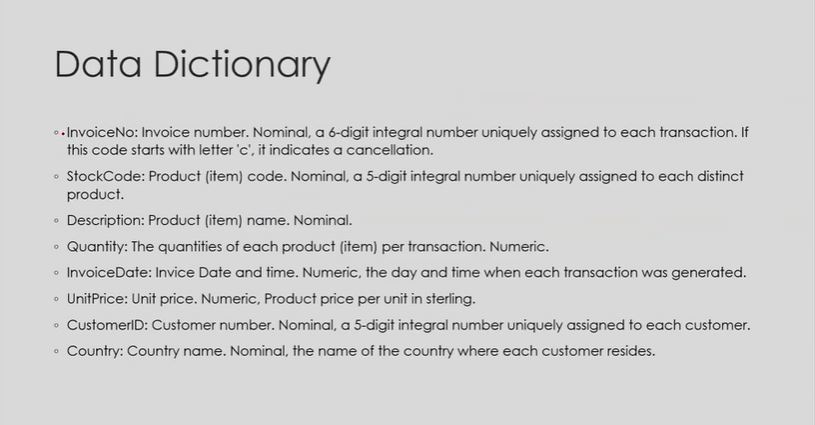

In [1]:
#Basic Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Analysis & Transformation

In [2]:
retail = pd.read_excel('Online Retail.xlsx')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,NaN,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
#Checking the basic information of the dataset

retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541908 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
retail.isnull().sum()

InvoiceNo           1
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

***Analyzing the "InvoiceNo"***

In [5]:
retail.loc[retail['InvoiceNo'] == 536365]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom


In [6]:
#Clearly there are lot of dupe entries for Invoices
#Lets revalidate the point

In [7]:
ret_gr = retail.groupby('InvoiceNo').aggregate({'StockCode': 'count'}).reset_index()
ret_gr.columns = ['InvoiceNo', 'Item Count']
ret_gr

,InvoiceNo,Item Count
0,536365,6
1,536366,2
2,536367,12
3,536368,4
4,536369,1
...,...,...
25895,C581484,1
25896,C581490,2
25897,C581499,1
25898,C581568,1


In [8]:
#Instead of invoices we can create a new columns as 'CancellationStatus' with 1, 0
#Then remove InvoiceNo feature

retail['CancellationStatus'] = retail['InvoiceNo'].apply(str).apply(lambda x : 1 if (x[0] == 'C') or (x[0] == 'c') else 0)
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CancellationStatus
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,NaN,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0


In [9]:
#Removing invoice column

retail_inv = retail.drop('InvoiceNo', axis=1)
retail_inv

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CancellationStatus
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0
541905,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0
541906,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0


***Checking relevance of StockCode, Description & CustomerID***

In [10]:
#Now let me check the stockcode

retail_inv['StockCode'].value_counts()

85123A      2313
22423       2203
85099B      2159
47566       1727
20725       1639
            ... 
51014c         1
90181C         1
79323G         1
DCGS0071       1
23643          1
Name: StockCode, Length: 4070, dtype: int64

In [11]:
#StockCode maybe not useful but maybe classify the types from the description
#However, description can be removed frpm original dataset
#Regarding stockcode we can normalize the the stockcode count and use it.

In [12]:
#As of now we are keepping the product data seperate
#and remove the columns from the original dataset

product = retail_inv[['StockCode', 'Description']]

stockCode = retail_inv['StockCode'].value_counts().index
stockNorm = retail_inv['StockCode'].value_counts(normalize=True).values

prodNorm = dict(zip(stockCode, stockNorm))

retail_inv['ProdNorm'] = retail_inv['StockCode'].apply(lambda x : prodNorm[x])
retail_prod = retail_inv.drop(['Description', 'StockCode'], axis=1)
retail_prod.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CancellationStatus,ProdNorm
0,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,0.004268
1,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,0.000655
2,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,0.000546
3,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,0.000875
4,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,0.000834


In [13]:
product.head()

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.


In [14]:
#similarly, lets remove customer id as well.

retail_cust = retail_prod.drop(['CustomerID'], axis=1)
retail_cust

,Quantity,InvoiceDate,UnitPrice,Country,CancellationStatus,ProdNorm
0,6,2010-12-01 08:26:00,2.55,United Kingdom,0,0.004268
1,6,2010-12-01 08:26:00,3.39,United Kingdom,0,0.000655
2,8,2010-12-01 08:26:00,2.75,United Kingdom,0,0.000546
3,6,2010-12-01 08:26:00,3.39,United Kingdom,0,0.000875
4,6,2010-12-01 08:26:00,3.39,United Kingdom,0,0.000834
...,...,...,...,...,...,...
541904,12,2011-12-09 12:50:00,0.85,France,0,0.000273
541905,6,2011-12-09 12:50:00,2.10,France,0,0.000591
541906,4,2011-12-09 12:50:00,4.15,France,0,0.000581
541907,4,2011-12-09 12:50:00,4.15,France,0,0.000299


***Analyzing country column***

In [15]:
retail_cust['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [16]:
#Can create dummies using pandas factorize then remove country

fact, idx = pd.factorize(retail_cust['Country'])
retail_cust['CountryFactor'] = fact
retail_country = retail_cust.drop(['Country'], axis=1)
retail_country.head()

,Quantity,InvoiceDate,UnitPrice,CancellationStatus,ProdNorm,CountryFactor
0,6,2010-12-01 08:26:00,2.55,0,0.004268,0
1,6,2010-12-01 08:26:00,3.39,0,0.000655,0
2,8,2010-12-01 08:26:00,2.75,0,0.000546,0
3,6,2010-12-01 08:26:00,3.39,0,0.000875,0
4,6,2010-12-01 08:26:00,3.39,0,0.000834,0


***Analyzing invoice date***

In [17]:
retail_country['Day'] = retail_country['InvoiceDate'].astype('datetime64').dt.dayofweek
retail_country['Week'] = retail_country['InvoiceDate'].astype('datetime64').dt.isocalendar().week
retail_country['Hour'] = retail_country['InvoiceDate'].astype('datetime64').dt.hour
retail_country['Month'] = retail_country['InvoiceDate'].astype('datetime64').dt.month_name()

In [18]:
retail_country.head()

,Quantity,InvoiceDate,UnitPrice,CancellationStatus,ProdNorm,CountryFactor,Day,Week,Hour,Month
0,6,2010-12-01 08:26:00,2.55,0,0.004268,0,2,48,8,December
1,6,2010-12-01 08:26:00,3.39,0,0.000655,0,2,48,8,December
2,8,2010-12-01 08:26:00,2.75,0,0.000546,0,2,48,8,December
3,6,2010-12-01 08:26:00,3.39,0,0.000875,0,2,48,8,December
4,6,2010-12-01 08:26:00,3.39,0,0.000834,0,2,48,8,December


In [19]:
#Create Quarter from Month then remove month

# quarter = {'Q1': ['April', 'May', 'June'], 'Q2': ['July', 'August', 'September'], 
#            'Q3': ['October', 'November', 'December'], 'Q4': ['January', 'February', 'March']}

#retail_country['QTR'] = retail_country.Month.replace(to_replace=[['April', 'May', 'June'],['July', 'August', 'September'],['October', 'November', 'December'],['January', 'February', 'March']], value=['Q1', 'Q2', 3, 4])
retail_country['QTR'] = retail_country.Month.replace(to_replace=['April', 'May', 'June'], value=1)
retail_country['QTR'] = retail_country.QTR.replace(to_replace=['July', 'August', 'September'], value=2)
retail_country['QTR'] = retail_country.QTR.replace(to_replace=['October', 'November', 'December'], value=3)
retail_country['QTR'] = retail_country.QTR.replace(to_replace=['January', 'February', 'March'], value=4)

retail_qtr = retail_country.drop(['Month'], axis=1)
retail_qtr.head()

,Quantity,InvoiceDate,UnitPrice,CancellationStatus,ProdNorm,CountryFactor,Day,Week,Hour,QTR
0,6,2010-12-01 08:26:00,2.55,0,0.004268,0,2,48,8,3
1,6,2010-12-01 08:26:00,3.39,0,0.000655,0,2,48,8,3
2,8,2010-12-01 08:26:00,2.75,0,0.000546,0,2,48,8,3
3,6,2010-12-01 08:26:00,3.39,0,0.000875,0,2,48,8,3
4,6,2010-12-01 08:26:00,3.39,0,0.000834,0,2,48,8,3


In [20]:
#Add transaction session

retail_qtr['TransSession'] = retail_qtr.Hour.replace(to_replace=[[6,7,8,9,10,11],[12,13,14,15,16],[17,18,19,20]],
                                                     value=['Morning', 'Afternoon', 'Evening'])
retail_session = retail_qtr.drop(['Hour', 'InvoiceDate'], axis=1)
retail_session

,Quantity,UnitPrice,CancellationStatus,ProdNorm,CountryFactor,Day,Week,QTR,TransSession
0,6,2.55,0,0.004268,0,2,48,3,Morning
1,6,3.39,0,0.000655,0,2,48,3,Morning
2,8,2.75,0,0.000546,0,2,48,3,Morning
3,6,3.39,0,0.000875,0,2,48,3,Morning
4,6,3.39,0,0.000834,0,2,48,3,Morning
...,...,...,...,...,...,...,...,...,...
541904,12,0.85,0,0.000273,1,4,49,3,Afternoon
541905,6,2.10,0,0.000591,1,4,49,3,Afternoon
541906,4,4.15,0,0.000581,1,4,49,3,Afternoon
541907,4,4.15,0,0.000299,1,4,49,3,Afternoon


In [27]:
#Perform onehot encoding for TransSession

enc = pd.get_dummies(retail_session['TransSession'], prefix='Slot', drop_first='True')

retail_slot = pd.concat([retail_session, enc], axis=1).drop(['TransSession'], axis=1)
retail_slot.head()

,Quantity,UnitPrice,CancellationStatus,ProdNorm,CountryFactor,Day,Week,QTR,Slot_Evening,Slot_Morning
0,6,2.55,0,0.004268,0,2,48,3,0,1
1,6,3.39,0,0.000655,0,2,48,3,0,1
2,8,2.75,0,0.000546,0,2,48,3,0,1
3,6,3.39,0,0.000875,0,2,48,3,0,1
4,6,3.39,0,0.000834,0,2,48,3,0,1


In [28]:
#Descriptive stats of the data

retail_slot.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.000000,1.000000,3.000000,10.000000,80995.000000
UnitPrice,541909.0,4.611114,96.759853,-11062.060000,1.250000,2.080000,4.130000,38970.000000
CancellationStatus,541909.0,0.017139,0.129791,0.000000,0.000000,0.000000,0.000000,1.000000
ProdNorm,541909.0,0.000799,0.000736,0.000002,0.000284,0.000565,0.001067,0.004268
CountryFactor,541909.0,0.615585,2.849583,0.000000,0.000000,0.000000,0.000000,37.000000
Day,541909.0,2.431277,1.844709,0.000000,1.000000,2.000000,4.000000,6.000000
Week,541909.0,30.729049,15.146243,1.000000,18.000000,34.000000,45.000000,51.000000
QTR,541909.0,2.569917,0.997935,1.000000,2.000000,3.000000,3.000000,4.000000
Slot_Evening,541909.0,0.075767,0.264626,0.000000,0.000000,0.000000,0.000000,1.000000
Slot_Morning,541909.0,0.277493,0.447762,0.000000,0.000000,0.000000,1.000000,1.000000


In [31]:
#Lets scale the dataset

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled = sc.fit_transform(retail_slot)

retail_scaled = pd.DataFrame(scaled, index=retail_slot.index, columns=retail_slot.columns).add_suffix('_std')
retail_scaled.head()

,Quantity_std,UnitPrice_std,CancellationStatus_std,ProdNorm_std,CountryFactor_std,Day_std,Week_std,QTR_std,Slot_Evening_std,Slot_Morning_std
0,-0.016289,-0.021301,-0.132054,4.711680,-0.216027,-0.233792,1.140281,0.430974,-0.286319,1.613596
1,-0.016289,-0.012620,-0.132054,-0.196013,-0.216027,-0.233792,1.140281,0.430974,-0.286319,1.613596
2,-0.007118,-0.019234,-0.132054,-0.343896,-0.216027,-0.233792,1.140281,0.430974,-0.286319,1.613596
3,-0.016289,-0.012620,-0.132054,0.102258,-0.216027,-0.233792,1.140281,0.430974,-0.286319,1.613596
4,-0.016289,-0.012620,-0.132054,0.047116,-0.216027,-0.233792,1.140281,0.430974,-0.286319,1.613596


In [32]:
from sklearn.cluster import KMeans

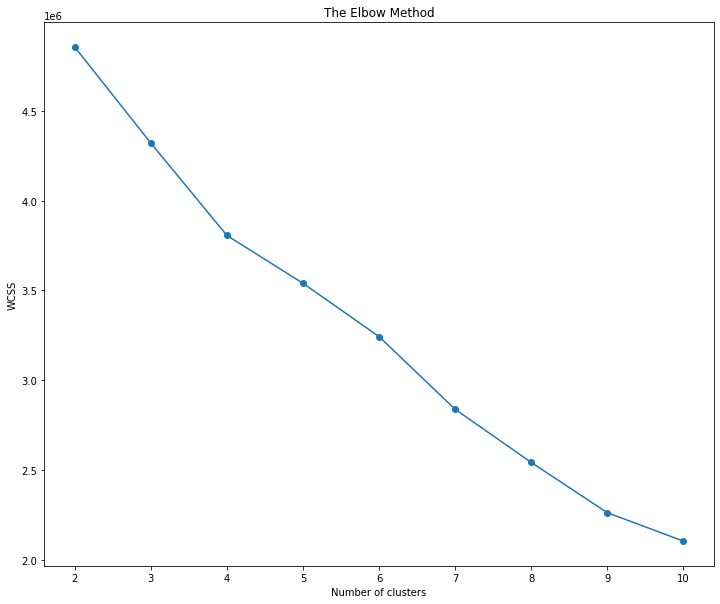

In [40]:
#Decide on number of clusters

plt.figure(figsize=(12,10))
kmax = 10
wcss = []
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(retail_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, kmax+1), wcss, 'o-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Read about KMeans